In [21]:
from googleapiclient.discovery import build

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from textacy import *
import pandas as pd
import torch
import transformers
from transformers import BertTokenizer, BertModel
import numpy as np
import matplotlib.pyplot as plt

In [5]:
api_key = 'ЗДЕСЬ ВАШ API КЛЮЧ GOOGLE'

In [6]:
def video_comments(video_id):
    comments = []

    youtube = build('youtube', 'v3',
                    developerKey=api_key)

    video_response=youtube.commentThreads().list(
    part='snippet,replies',
    videoId=video_id,
    ).execute()
    
    # Ограничитель на количество страниц комментариев (для предотвращения превышения квоты)
    max_pages = 100
    
    act_page = 0    

    while video_response and act_page < max_pages:
        for item in video_response['items']:     
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
            
            reply_count = item['snippet']['totalReplyCount']

            if reply_count > 0:
                
                for reply in item['replies']['comments']:
                    
                    reply = reply['snippet']['textDisplay']
                    
                    comments.append(reply)

        if 'nextPageToken' in video_response:
            video_response = youtube.commentThreads().list(
                    part = 'snippet,replies',
                    videoId = video_id
                ).execute()
            
            act_page += 1
        else:
            break
            
    return comments


In [12]:
texts_df = pd.DataFrame(columns=['comment', 'comment_vector'])

In [13]:
video_ids = ["I6-4CxXfJc8", "dDecK6vFko8", "Qz1LU2wBx-Y", 
             "nKqoz53Xv8Q", "dyMV6M5lUFM", "itTyrmKsUv0", 
             "JxvI2n8mAIk", "759z_dI04KQ", "2T-G6SZeakY"]

for video_id in video_ids:
    print(video_id)
    comments = video_comments(video_id)
    
    for i in range(len(comments)):
        texts_df.loc[i] = re.sub(r"<[^>]+>", "", comments[i], flags=re.S)

I6-4CxXfJc8
dDecK6vFko8
Qz1LU2wBx-Y
nKqoz53Xv8Q
dyMV6M5lUFM
itTyrmKsUv0
JxvI2n8mAIk
759z_dI04KQ
2T-G6SZeakY


In [14]:
texts_df

,comment,comment_vector
0,Абсорбер уже отпадал два раза. Мудачье проэкти...,Абсорбер уже отпадал два раза. Мудачье проэкти...
1,32:40 там должна стоять защита топливных трубо...,32:40 там должна стоять защита топливных трубо...
2,Здравствуйте у меня логон 2 можно к вам на рем...,Здравствуйте у меня логон 2 можно к вам на рем...
3,"Молодец, красиво всё объяснил и при этом не ко...","Молодец, красиво всё объяснил и при этом не ко..."
4,Наконец то ТЕХНИЧЕСКИЙ обзор! Так держать! Бол...,Наконец то ТЕХНИЧЕСКИЙ обзор! Так держать! Бол...
...,...,...
2895,Руку видетели некуда положить подстаканники не...,Руку видетели некуда положить подстаканники не...
2896,"Да, но здесь вопрос удобства. Многие проводят ...","Да, но здесь вопрос удобства. Многие проводят ..."
2897,"На Иксиде спинка греется, только чуть медленне...","На Иксиде спинка греется, только чуть медленне..."
2898,Нафиг в подстаканник ставить термос или бутылк...,Нафиг в подстаканник ставить термос или бутылк...


## Пример для понимания

In [22]:
tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny2')

In [29]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("DeepPavlov/rubert-base-cased-sentence")
                         
model.eval()

sentences = [ 
              "Доктор",
              "Медсестра",
              "Шприц",
              "Пожар",
              "Огонь",
              "Огнетушитель, противопожарный, огнеупорный",
              "Ожог",
              "Полицейский",
              "Арест, пистолет, наручники, расследование",
            ]

embeddings = []

for sentence in texts_df["comment_vector"]:
    embeddings.append(model.encode(sentence))

No sentence-transformers model found with name /Users/nurlan/.cache/torch/sentence_transformers/DeepPavlov_rubert-base-cased-sentence. Creating a new one with MEAN pooling.


In [30]:
embeddings

[array([-3.64174604e-01,  7.17362016e-02, -3.70877057e-01, -2.45049641e-01,
        -1.05493057e+00, -6.61139548e-01,  4.72885996e-01,  5.60823619e-01,
        -2.37721503e-01, -2.98103660e-01,  3.05595130e-01, -8.19043666e-02,
        -7.02524662e-01,  6.76629320e-02, -2.22787544e-01, -5.89690030e-01,
         2.97394693e-01,  1.23277307e-01, -1.27016246e+00,  1.52291164e-01,
        -1.89648464e-01, -1.27319193e+00, -4.17553276e-01,  3.75991434e-01,
         6.95421398e-01,  6.36706650e-01, -3.47082704e-01,  6.86619878e-02,
         8.37158978e-01,  9.20162678e-01, -6.21032953e-01,  1.61538690e-01,
        -4.78008002e-01,  2.73972362e-01, -2.72059888e-01, -5.33153117e-01,
        -3.80171776e-01,  7.00844765e-01, -3.67218286e-01, -1.07905602e+00,
        -3.22080478e-02,  2.66200036e-01,  5.66142738e-01,  1.69083118e-01,
        -4.85348562e-03, -1.15796101e+00,  8.76772404e-01,  7.46567249e-01,
        -2.68428057e-01, -1.42979658e+00,  9.33090687e-01, -1.08479314e-01,
        -4.2

In [123]:
def calc_distance(v1, v2):
    return np.linalg.norm(v1 - v2)

In [181]:
n = len(embeddings)
dist_matrix = np.zeros((n, n))

In [182]:
for i in range(n):
    for j in range(i+1, n):
        dist = calc_distance(embeddings[i], embeddings[j])
        dist_matrix[i, j] = dist
        dist_matrix[j, i] = dist


In [183]:
dist_matrix

array([[ 0.        , 12.22643757, 14.06834602, 19.5966053 , 18.954422  ,
        17.95013237, 13.57780743, 12.20823097, 15.57668495],
       [12.22643757,  0.        , 16.18307495, 21.75221252, 20.92477798,
        20.27623749, 17.6305542 , 15.38953781, 18.3809948 ],
       [14.06834602, 16.18307495,  0.        , 17.67476845, 16.09559822,
        17.85491753, 13.50152016, 14.40353012, 17.75660324],
       [19.5966053 , 21.75221252, 17.67476845,  0.        ,  7.82927513,
        12.7657156 , 16.18492889, 20.19151497, 21.23590279],
       [18.954422  , 20.92477798, 16.09559822,  7.82927513,  0.        ,
        12.74118137, 14.39566612, 18.71794701, 20.13665199],
       [17.95013237, 20.27623749, 17.85491753, 12.7657156 , 12.74118137,
         0.        , 15.18928623, 18.94072342, 19.24055481],
       [13.57780743, 17.6305542 , 13.50152016, 16.18492889, 14.39566612,
        15.18928623,  0.        , 15.50619221, 17.52877045],
       [12.20823097, 15.38953781, 14.40353012, 20.19151497, 18

/Users/nurlan/Documents/HSE/Магистратура/Маркетинговые стратегии/Netflix/UserAnalysis/user_analysis_venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


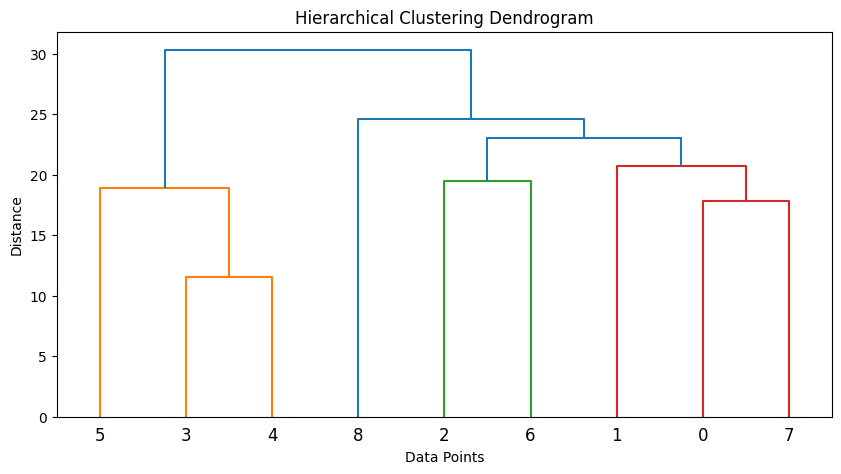

In [184]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(dist_matrix, method='average', metric='euclidean')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [186]:
Z

array([[ 3.        ,  4.        , 11.52248854,  2.        ],
       [ 0.        ,  7.        , 17.81186199,  2.        ],
       [ 5.        ,  9.        , 18.92814014,  3.        ],
       [ 2.        ,  6.        , 19.50386295,  2.        ],
       [ 1.        , 10.        , 20.7073955 ,  3.        ],
       [12.        , 13.        , 23.04753421,  5.        ],
       [ 8.        , 14.        , 24.63160548,  6.        ],
       [11.        , 15.        , 30.31514654,  9.        ]])

In [190]:
from scipy.cluster import hierarchy

labels = hierarchy.fcluster(Z, 15, criterion='distance')
labels

array([5, 7, 3, 1, 1, 2, 4, 6, 8], dtype=int32)

In [161]:
sentences

['Доктор',
 'Медсестра',
 'Шприц',
 'Пожар',
 'Огонь',
 'Огнетушитель, противопожарный, огнеупорный',
 'Ожог',
 'Полицейский',
 'Арест, пистолет, наручники, расследование']

In [162]:
comment_vectors = []

In [163]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("DeepPavlov/rubert-base-cased-sentence")

model.eval()

for comment in texts_df["comment_vector"]:
    comment_vectors.append(model.encode(comment))

No sentence-transformers model found with name /Users/nurlan/.cache/torch/sentence_transformers/DeepPavlov_rubert-base-cased-sentence. Creating a new one with MEAN pooling.


In [191]:
n = len(comment_vectors)
dist_matrix = np.zeros((n, n))

In [192]:
for i in range(n):
    for j in range(i+1, n):
        dist = calc_distance(comment_vectors[i], comment_vectors[j])
        dist_matrix[i, j] = dist
        dist_matrix[j, i] = dist

In [193]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

output = linkage(dist_matrix, method='average', metric='euclidean')

/Users/nurlan/Documents/HSE/Магистратура/Маркетинговые стратегии/Netflix/UserAnalysis/user_analysis_venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


In [196]:
output

array([[2.01700000e+03, 2.04200000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.06700000e+03, 2.90000000e+03, 0.00000000e+00, 3.00000000e+00],
       [2.09200000e+03, 2.90100000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [5.78700000e+03, 5.79500000e+03, 2.73678629e+02, 2.08300000e+03],
       [5.79100000e+03, 5.79600000e+03, 2.88262456e+02, 2.55100000e+03],
       [5.79400000e+03, 5.79700000e+03, 2.96991737e+02, 2.90000000e+03]])

## Дендограмма получившихся кластеров

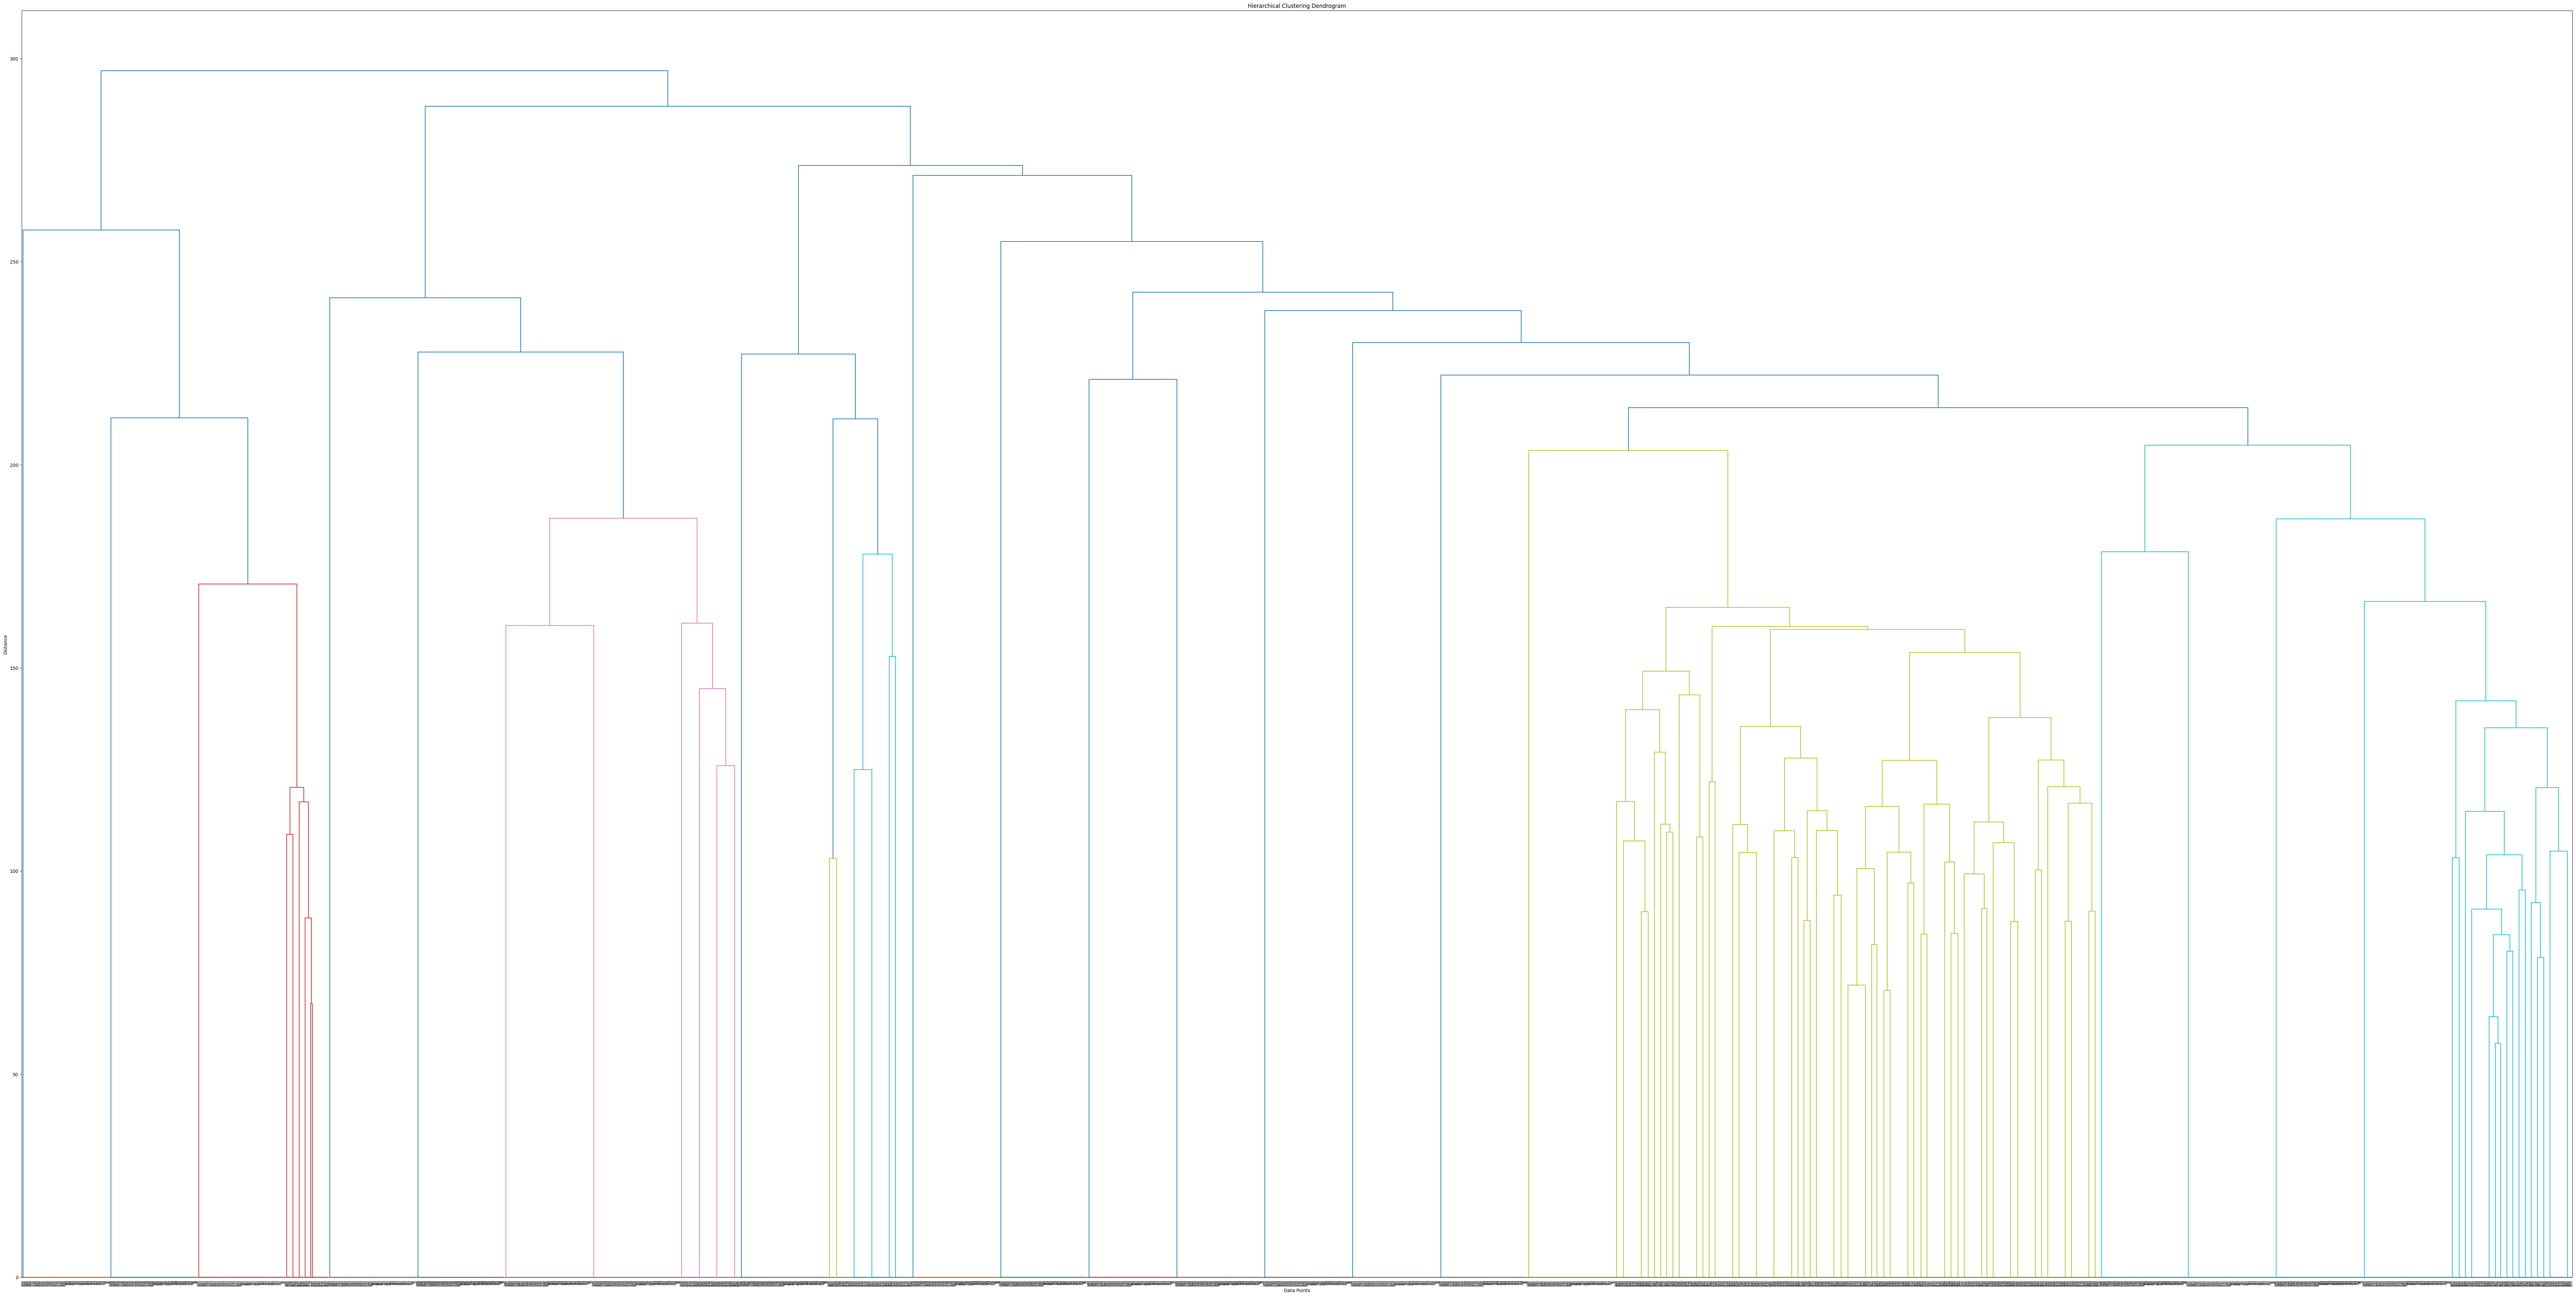

In [178]:
fig = plt.figure(figsize=(100, 50))
dendrogram(output)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

fig.savefig("myfig.png",dpi=200)

In [221]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt


threshold = 25  # set your desired distance threshold
cluster_labels = fcluster(output, threshold, criterion='distance')

cluster_sizes = np.bincount(cluster_labels)
min_cluster_size = 99

# Get indices of data points belonging to the biggest clusters
biggest_cluster_indices = np.where(cluster_sizes >= min_cluster_size)[0]

# Get examples from the biggest clusters
examples_from_biggest_clusters = texts_df.iloc[biggest_cluster_indices]

In [222]:
for example in examples_from_biggest_clusters["comment"]:
    print(example)
    print()

32:40 там должна стоять защита топливных трубок, или алюминиевая или жестяная.. у вас га видео видно что она была до покрытия, потом её сняли

Здравствуйте у меня логон 2 можно к вам на ремонт записатся

Молодец, красиво всё объяснил и при этом не кого не обидел, респект.

Человек помазок)))) на вагах хоть мажь хоть не мажь, все открутиться

нунафиг,лучше уж нашего русака взять,по крайней мере так кариесом страдать не будет,и запчасти в наличии!

Красава. 👍. Интересно было послушать и посмотреть.

Мля.... Машина прошла 70 тем, смотришь днище, а оно цветёт! Аки цветок весной! Печально

1.5 литра турбо, и такой тяжелый кузов сколько ресур у этого двигателя??

Еще обратите внимание на вибрацию от  подушек двигателя. Следует докрутить. Также бывают сорваны шпильки крепления головки двигуна. Все таки китайский инженер и рабочий это вам не ровня немцам и французам. Эти поделки собраны в чинке для  стран 3 мира. Поэтому основной сбыт- это россия и африка. Просто в россии они продаются в 3 цен